<a href="https://colab.research.google.com/github/vaidande/Cotton-Disease-Prediction/blob/main/Cotton_Disease_Prediction_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]
 
train_path = '/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train'
valid_path = '/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/val'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)#+ [3]: No. of channels.(RGB)
                                                                                            #weights='imagnet': retrives the same weights which where used in the ImageNet competition.
                                                                                            #include_top=False: removes the default VGG16 input, Flatten and Output layer.

In [5]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
#don't train existing weights.
for layer in inception.layers:
  layer.trainable = False

In [7]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train/*')

In [8]:
#adding Flatten layer..
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [15]:
r = model.fit_generator(training_set,
                        validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 851s 14s/step - loss: 3.3371 - accuracy: 0.6000 - val_loss: 0.7906 - val_accuracy: 0.8549
Epoch 2/20
61/61 [==============================] - 35s 576ms/step - loss: 0.5879 - accuracy: 0.8789 - val_loss: 1.2075 - val_accuracy: 0.8179
Epoch 3/20
61/61 [==============================] - 35s 568ms/step - loss: 0.5171 - accuracy: 0.9017 - val_loss: 0.5048 - val_accuracy: 0.9198
Epoch 4/20
61/61 [==============================] - 35s 567ms/step - loss: 0.4482 - accuracy: 0.9332 - val_loss: 0.7383 - val_accuracy: 0.8796
Epoch 5/20
61/61 [==============================] - 34s 565ms/step - loss: 0.6175 - accuracy: 0.9009 - val_loss: 0.4380 - val_accuracy: 0.9198
Epoch 6/20
61/61 [==============================] - 34s 564ms/step - loss: 0.5508 - accuracy: 0.9209 - val_loss: 0.9406 - val_accuracy: 0.8704
Epoch 7/20
61/61 [==============================] - 34s 562ms/step - loss: 0.3498 - accuracy: 0.9379 - val_loss: 0.3840 - val_accuracy: 0.9321


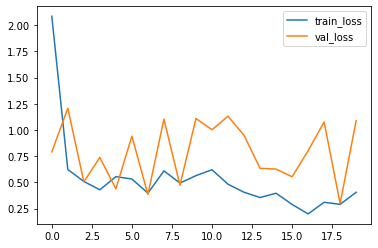

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

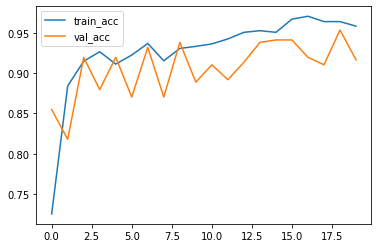

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

In [23]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/model/model_inception.h5')

In [24]:
y_pred = model.predict(test_set)

In [25]:
y_pred = np.argmax(y_pred, axis = 1)

In [26]:
y_pred

array([2, 0, 0, 3, 2, 0, 3, 3, 1, 3, 2, 0, 2, 1, 1, 0, 3, 1, 3, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 3, 1, 0, 1, 2, 0, 1, 1, 2, 3,
       2, 0, 1, 1, 2, 3, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       2, 0, 2, 3, 0, 1, 2, 3, 1, 2, 3, 1, 1, 1, 3, 1, 0, 2, 1, 0, 1, 3,
       2, 2, 3, 2, 0, 1, 2, 1, 0, 2, 3, 1, 2, 3, 3, 1, 1, 2, 1, 2, 3, 3,
       3, 2, 0, 2, 0, 2, 2, 0, 3, 3, 0, 1, 1, 2, 1, 2, 1, 2, 2, 3, 0, 1,
       1, 1, 3, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 3, 1, 3, 1, 1, 2, 1, 3, 1,
       1, 2, 3, 1, 3, 1, 3, 3, 0, 3, 1, 1, 0, 2, 2, 1, 1, 3, 1, 0, 3, 0,
       0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 3, 0, 3, 0, 3, 3, 3, 0, 1, 1, 1, 2,
       1, 3, 1, 2, 2, 1, 1, 3, 1, 2, 0, 2, 3, 1, 2, 3, 1, 2, 3, 1, 0, 2,
       1, 1, 0, 3, 3, 1, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 3, 0, 1,
       0, 1, 3, 1, 1, 1, 1, 3, 3, 0, 1, 0, 0, 2, 3, 0, 3, 2, 3, 1, 1, 0,
       0, 3, 2, 3, 3, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 3, 0, 3,
       1, 1, 1, 2, 1, 2, 0, 1, 1, 3, 2, 3, 1, 3, 1,

In [81]:
x=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (248).jpg',target_size=(224,224))

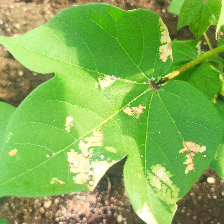

In [82]:
x

In [83]:
test_img = image.img_to_array(x)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [85]:
a=np.argmax(result, axis=1)

In [86]:
if a==0:
  print("The Leaf is diseased Cotton Leaf")
elif a==1:
  print("The Leaf is diseased Cotton Plant")
elif a==2:
  print("The Leaf is fresh Cotton Leaf")
else:
  print("The Leaf is fresh Cotton Plant")

The Leaf is diseased Cotton Leaf
